# <center>Homework 3 - The Decoder Transformer: Implementing a nanoGPT with Andrej Karpathy</center>

<center>Submitted by: <b>BJ Enrik Yepes</b></center>

ChatGPT has revolutionized the world, ushering in the era of AI and generative models. At its core lies a powerful algorithm called Generative Pretrained Transformer (GPT), inspired by the groundbreaking research paper "Attention is All You Need" by Vaswani et al. GPT builds upon the successes of its predecessors, GPT-2 and GPT-3, both developed by openAI. These models have set new benchmarks in natural language processing and have showcased remarkable capabilities in generating human-like text. [1]

In this notebook, we embark on a coding journey alongside Andrej Karpathy, following his instructional video titled "Let's build GPT: from scratch, in code, spelled out." Our objective is to create a Decoder Transformer, also known as nanoGPT. The notebook is divided into three main parts:

1. Understanding the fundamentals of transformers and self-attention.
2. Implementing the complete nanoGPT code.
3. Fine-tuning nanoGPT to achieve lower loss and better results.

To facilitate understanding for our readers, we provide concise explanations in everyday language for each code cell. Furthermore, throughout the notebook, we address common questions about language models, aiming to enhance your comprehension of these powerful tools.

### What is a Language Model?

**Language Models**

A language model is a probabilistic model that estimates the likelihood of a sequence of words or characters in a given language.  It captures the patterns, grammar, and semantics of the language, enabling it to produce coherent and contextually appropriate text. [2] *See Figure 1.*

</br>

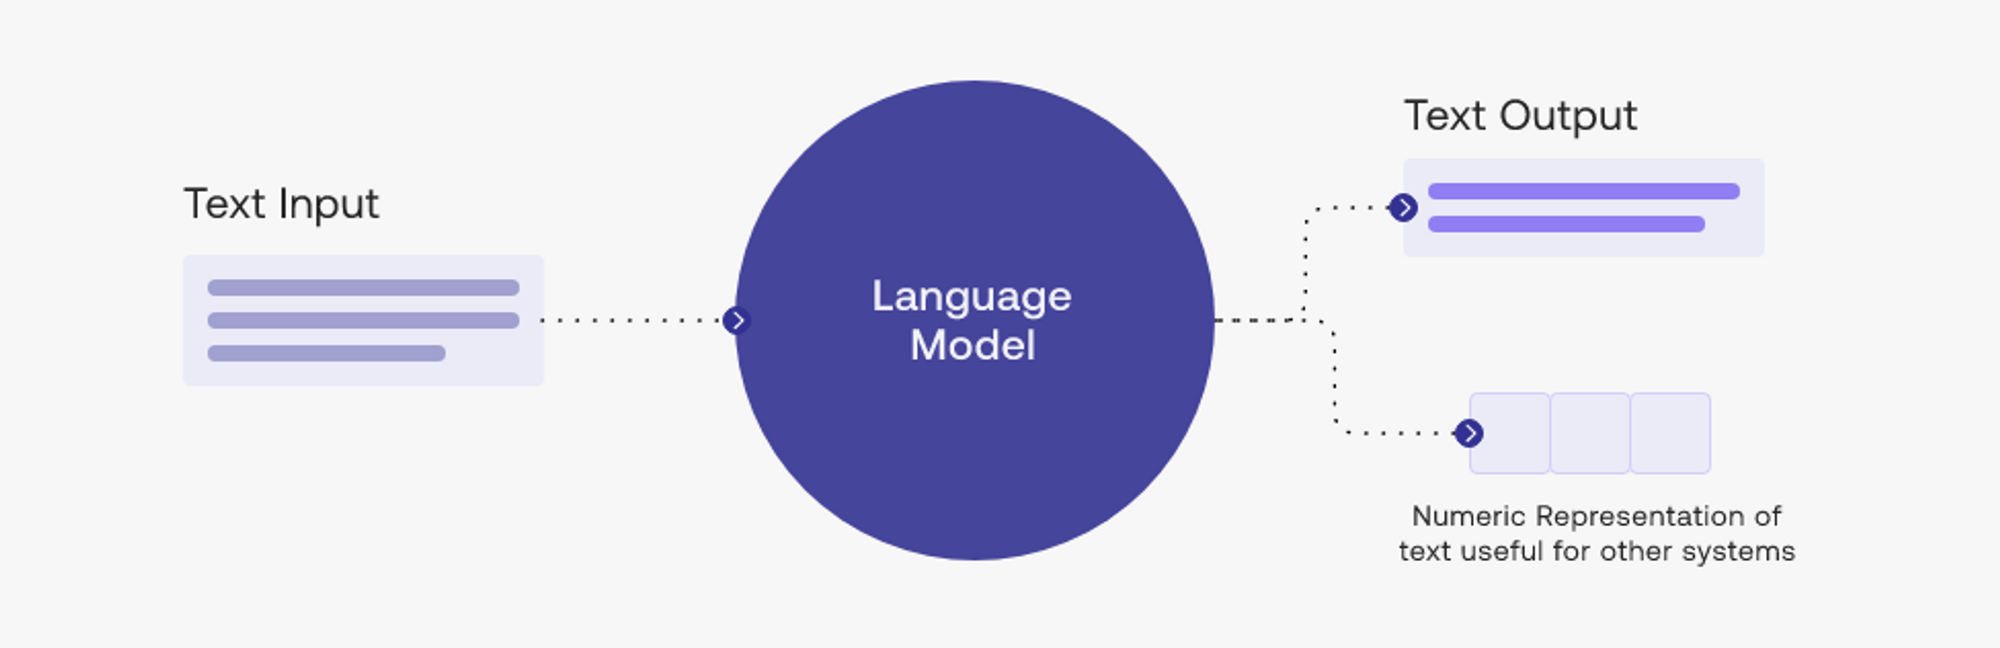

<center><b>Figure 1:</b> A language model.</center>

<center><b>Source:</b> Introduction to Large Language Models. (n.d.). Attri Blogs. Retrieved from https://attri.ai/blog/introduction-to-large-language-models</center>

</br>

In a much simpler context, it is like a smart text generator that learns from a lot of examples and figures out how words fit together in sentences. With that, it can generate new text that sounds natural and makes sense based on the patterns it learned.

**Large Language Models**

Large Language Models (LLMs), also known as pre-trained models (PTMs), are advanced form of language models that leverage extensive data to understand and capture the intricacies of language.

One notable feature of LLMs is their remarkable capacity to generate text that closely resembles human language. The generated text exhibits coherence, and grammatical accuracy, and occasionally possesses a touch of humor. Furthermore, these models can perform tasks such as language translation and question-answering, drawing upon contextual information to deliver accurate responses. [2]

**How These Models Work**

Large language models work by using a technique called unsupervised learning. In unsupervised learning, the model is trained on a large amount of data without any specific labels or targets. The goal is to learn the underlying structure of the data and use it to generate new data that is similar in structure to the original data. [2]

**Popular Examples of Large Language Models**

Some popular examples of large language models are:

- **`GPT-3:`** Developed by OpenAI, GPT-3 (Generative Pre-trained Transformer 3) is one of the largest language models with 175 billion parameters. It excels in generating human-like text, translation, question answering, and more. [6][7]
- **`BERT:`** Developed by Google, BERT (Bidirectional Encoder Representations from Transformers) has 340 million parameters and is trained on extensive text data. BERT understands sentence context and produces coherent and grammatically correct text.[8]
- **`T5:`** T5 (Text-to-Text Transfer Transformer) is a Google-developed language model with 11 billion parameters. It is trained for various natural language processing tasks, including text classification, generation, and translation. [2][9]

</br>

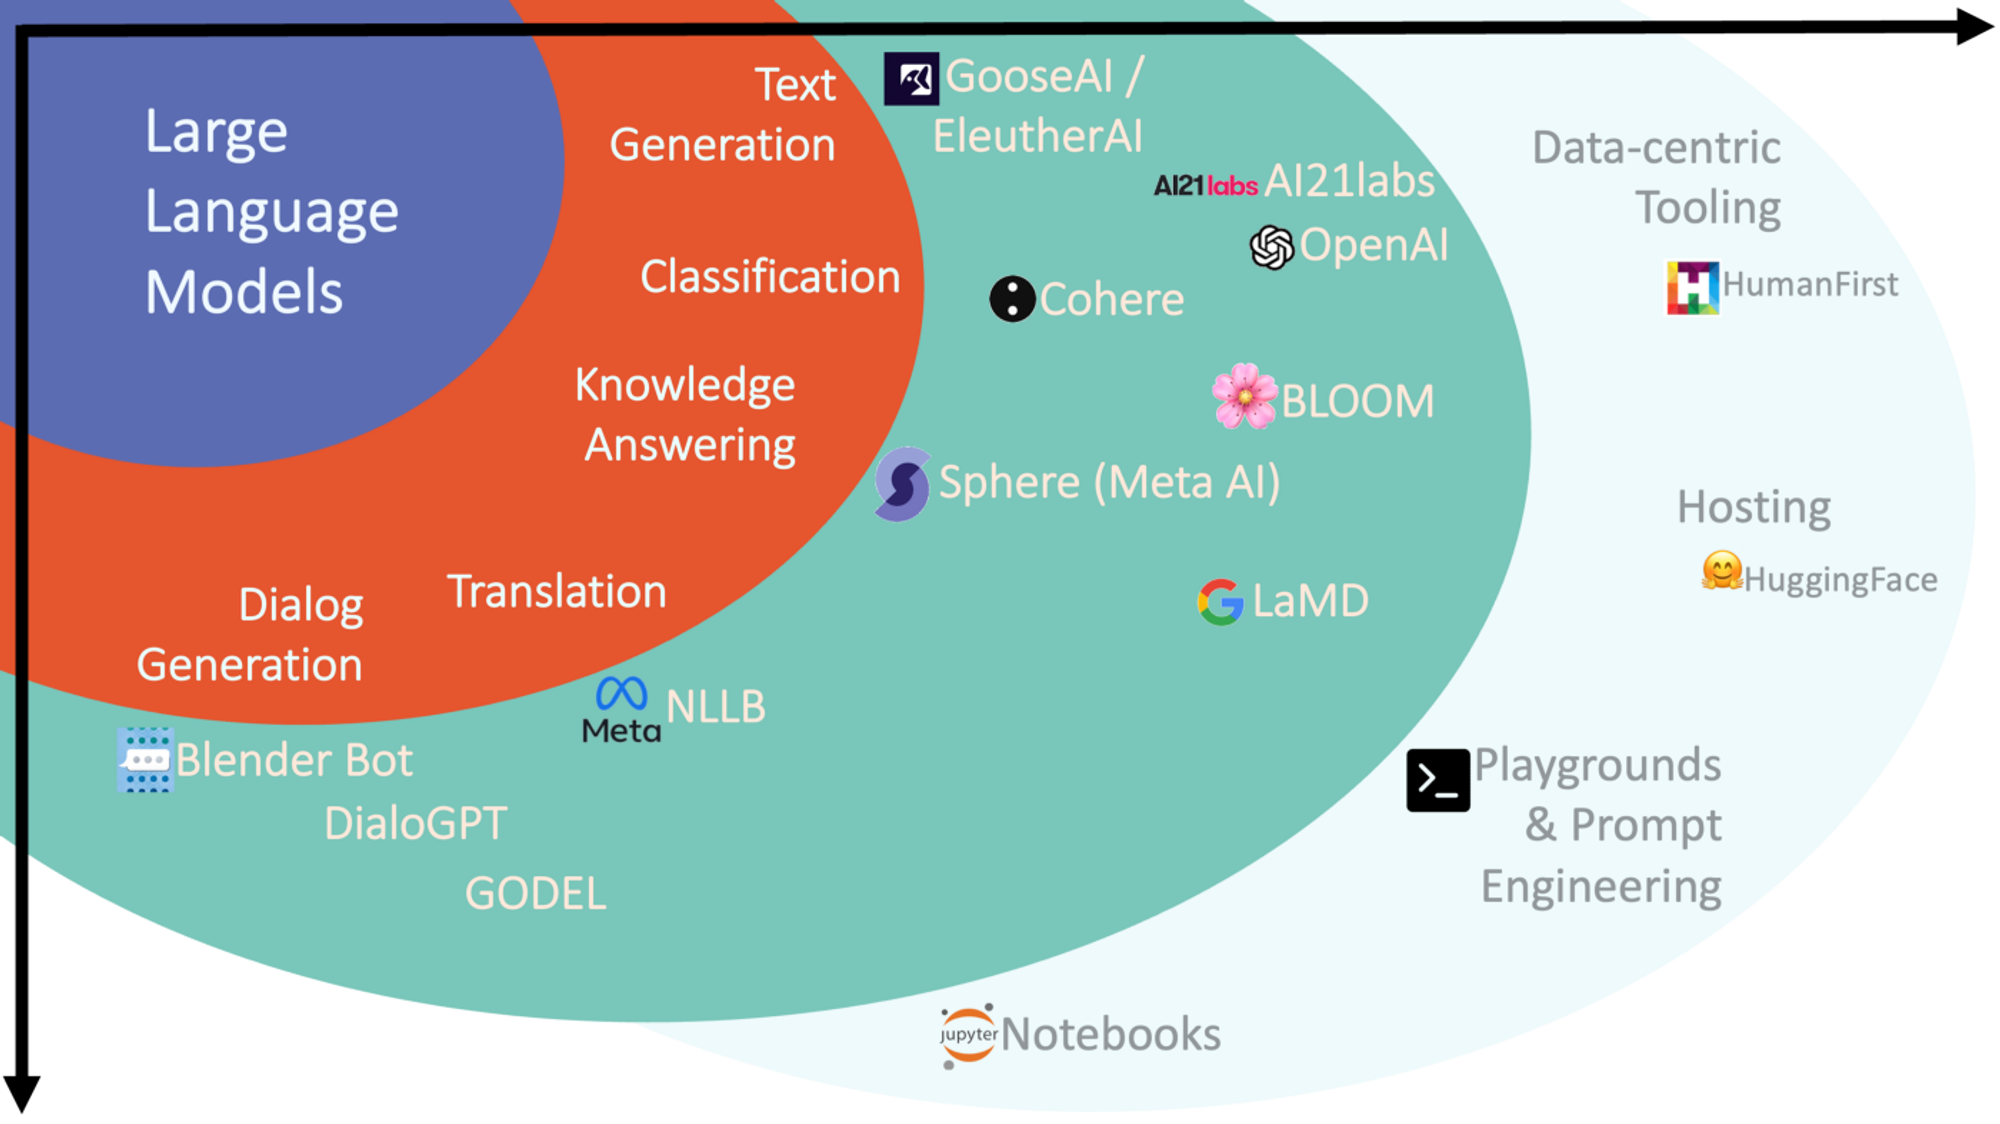

<center><b>Figure 2:</b> Paradigms of language models.</center>

<center><b>Source:</b> Introduction to Large Language Models. (n.d.). Attri Blogs. Retrieved from https://attri.ai/blog/introduction-to-large-language-models</center>

</br>

**Applications of Large Language Models**

Large language models have diverse applications across various fields *(See Figure 3)*, including [2]:

 - **`Language translation:`** Leveraging large language models like Google Translate for accurate and efficient translation between languages.
 - **`Question answering:`** Utilizing models such as BERT to answer questions based on contextual understanding.
 - **`Text summarization:`** Generating concise summaries of lengthy text documents.
 - **`Content creation:`** Employing large language models to generate high-quality content for marketing and advertising purposes.
 - **`Sentiment analysis:`** Using language models to analyze the sentiment of text, enabling sentiment classification and opinion mining.
 
</br> 
 
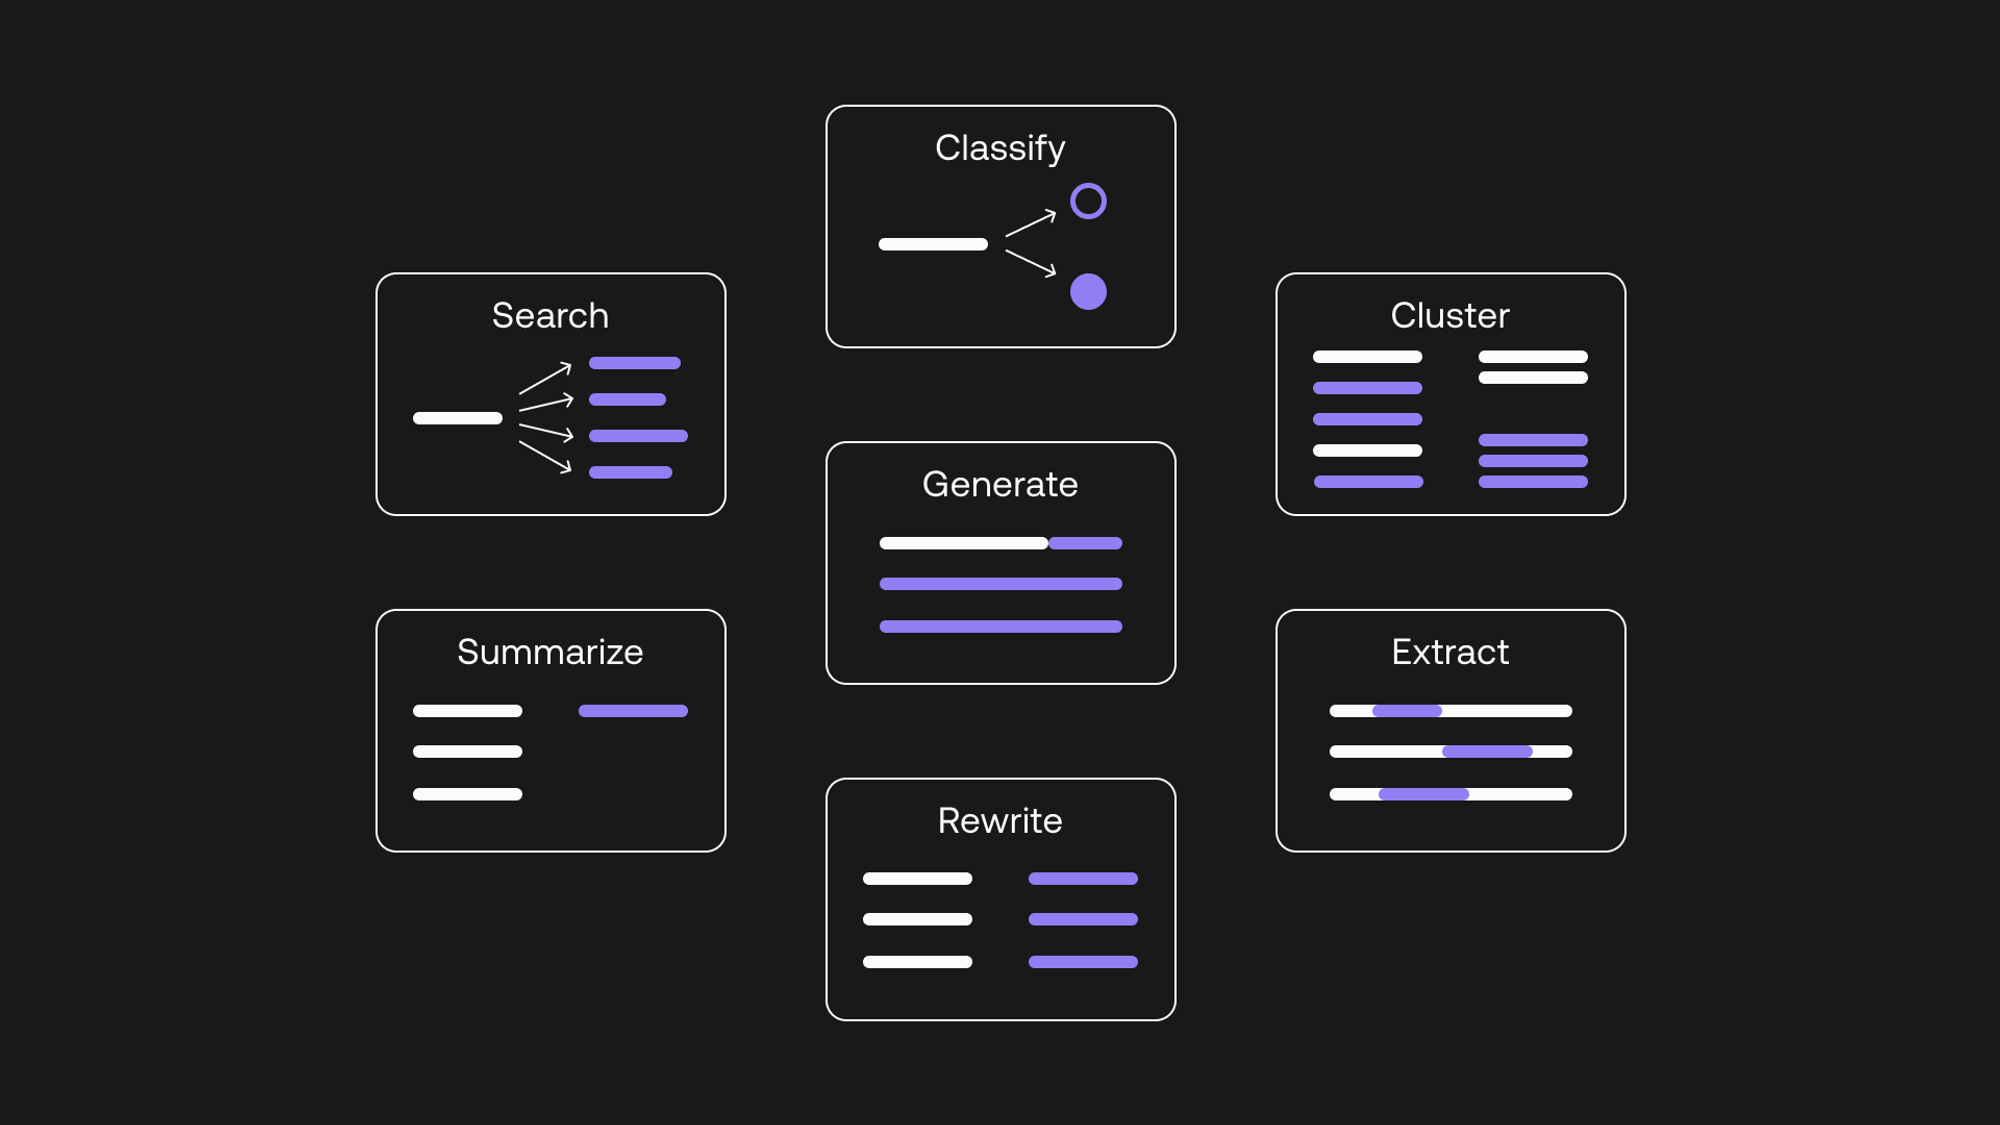

<center><b>Figure 3:</b> Various usecases of large language models.</center>

<center><b>Source:</b> Introduction to Large Language Models. (n.d.). Attri Blogs. Retrieved from https://attri.ai/blog/introduction-to-large-language-models</center>

</br>

*Note: The next set of questions are answered in part 2 of this notebook.*

## The Fundamentals of Transformers and Self Attention

To begin with, we focus on the Tinyshakespeare dataset. To obtain this dataset, we can utilize the following code snippet to download it directly from Andrej Karpathy's Github repository.

```
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
```

Alternatively, we can access the dataset using the provided link: https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt.

In [1]:
# !wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2023-06-01 04:51:12--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.04s   

2023-06-01 04:51:13 (29.5 MB/s) - ‘input.txt’ saved [1115394/1115394]



Next, we open the Tinyshakespeare dataset and assign its contents to the variable `text`.

In [61]:
# Read it in to inspect it
with open('input.txt', 'r', encoding='utf-8') as f:
    text=f.read()

The Tinyshakespeare dataset consists of 1,115,394 characters. This dataset provides a substantial amount of textual information, allowing for deep learning tasks of the Shakespearean text.

In [62]:
print("length of dataset in characters: ", len(text))

length of dataset in characters:  1115394


To provide a glimpse into the dataset's contents, we print a subset of the data, specifically the first 1000 characters. This subset allows us to observe a portion of the textual information and gain a preliminary understanding of the language and structure present in the Tinyshakespeare dataset.

In [63]:
# let's look at the first 1000 characters
print(text[:1000])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor citizens, the patricians good.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger for bread, not in thirst for revenge.



Next, we extract and sort all the unique characters from the text. This process allows us to determine the vocabulary size, which refers to the number of distinct characters used in the text.

In [64]:
# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)


 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
65


To enable encoding and decoding of text data, we create an indexing system that establishes a mapping between characters and integer indices. This is achieved using the following:

1. The `stoi` dictionary maps each character to a unique integer index.
2. The `itos` dictionary provides the reverse mapping, associating integer indices back to their corresponding characters.

This mapping allows for the conversion of strings to lists of integers (encoding) and vice versa (decoding), enabling various operations on the text data, such as numerical processing or generating text based on encoded sequences.

In [65]:
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

print(encode("hii there"))
print(decode(encode("hii there")))

[46, 47, 47, 1, 58, 46, 43, 56, 43]
hii there


The entire text dataset is encoded by converting each character to its corresponding integer index using the established character-to-integer mapping.

This conversion to integers is necessary because many machine learning models, including GPT (Generative Pretrained Transformer), require numerical input rather than raw text data.

By encoding the text as integers, we enable the model to process and learn from the data effectively, as numerical data can be manipulated and analyzed more efficiently within computational frameworks like PyTorch.

In [66]:
# let's now encode the entire text dataset and store it into a torch.Tensor
import torch # we use PyTorch: https://pytorch.org
data = torch.tensor(encode(text), dtype=torch.long)
print(data.shape, data.dtype)
print(data[:1000]) # the 1000 characters we looked at earier will to the GPT look like this

torch.Size([1115394]) torch.int64
tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
        53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52, 63,
         1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51, 43,  1,
        57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54, 43, 39, 49,
         6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57, 58,  1, 15, 47,
        58, 47, 64, 43, 52, 10,  0, 37, 53, 59,  1, 39, 56, 43,  1, 39, 50, 50,
         1, 56, 43, 57, 53, 50, 60, 43, 42,  1, 56, 39, 58, 46, 43, 56,  1, 58,
        53,  1, 42, 47, 43,  1, 58, 46, 39, 52,  1, 58, 53,  1, 44, 39, 51, 47,
        57, 46, 12,  0,  0, 13, 50, 50, 10,  0, 30, 43, 57, 53, 50, 60, 43, 42,
         8,  1, 56, 43, 57, 53, 50, 60, 43, 42,  8,  0,  0, 18, 47, 56, 57, 58,
         1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 18, 47, 56, 57, 58,  6,  1, 63,
        53, 59,  1, 49, 52, 53, 61,  1, 15, 39, 47, 59, 57,  1, 25, 39, 56, 41,
      

Following the standard practice in machine learning and deep learning, we will split the data into separate training and test sets. By allocating 90% of the data for training (train_data) and 10% for testing/validation (val_data), we ensure that the model is trained on a sufficiently large portion of the data while having an independent dataset for assessing its performance and generalization capabilities.

In [67]:
# Let's now split up the data into train and validation sets
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

During training, it is computationally expensive to feed the entire text data into the model at once. To address this, a workaround is to sample random chunks of data from the training set.

In this notebook, we refer to the size of these chunks as the "block size," which allows for more manageable and efficient processing of the data.

In [68]:
block_size = 8
train_data[:block_size+1]

tensor([18, 47, 56, 57, 58,  1, 15, 47, 58])

Next, we create input-output pairs to train a language model. By iterating through a sequence of length block_size, we gradually build a context sequence (context) and the corresponding target value (target) for each step. The context sequence expands by adding one element at a time from the x tensor, while the target value is extracted from the y tensor, representing the next element in the sequence. This approach enables the language model to learn the patterns and dependencies within the text data by predicting the next character based on the given context sequence.

In [69]:
x = train_data[:block_size]
y = train_data[1:block_size+1]
for t in range(block_size):
    context = x[:t+1]
    target = y[t]
    print(f"when input is {context} the target: {target}")

when input is tensor([18]) the target: 47
when input is tensor([18, 47]) the target: 56
when input is tensor([18, 47, 56]) the target: 57
when input is tensor([18, 47, 56, 57]) the target: 58
when input is tensor([18, 47, 56, 57, 58]) the target: 1
when input is tensor([18, 47, 56, 57, 58,  1]) the target: 15
when input is tensor([18, 47, 56, 57, 58,  1, 15]) the target: 47
when input is tensor([18, 47, 56, 57, 58,  1, 15, 47]) the target: 58


Taking inspiration from the previous code block, we utilize the same intuition to create a get_batch function. This function generates a small batch of data by randomly selecting indices from the dataset. By doing so, we can construct context sequences and extract the corresponding targets, enabling us to observe how the model should predict the next character based on a given context.

In simpler terms, when we provide the input as [24], the target character is 43. As we expand the input sequence to [24, 43], the target character becomes 58. Continuing this pattern, when the input is [24, 43, 58], the target character is 5. Each time we add a character to the input sequence, the target character shifts accordingly, helping the model learn the relationships between the input context and the subsequent character predictions.

In [70]:
torch.manual_seed(1337)
batch_size = 4 # how many independent sequences will we process in parallel?
block_size = 8 # what is the maximum context length for predictions?

def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    return x, y

xb, yb = get_batch('train')
print('inputs:')
print(xb.shape)
print(xb)
print('targets:')
print(yb.shape)
print(yb)

print('----')

for b in range(batch_size): # batch dimension
    for t in range(block_size): # time dimension
        context = xb[b, :t+1]
        target = yb[b,t]
        print(f"when input is {context.tolist()} the target: {target}")

inputs:
torch.Size([4, 8])
tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]])
targets:
torch.Size([4, 8])
tensor([[43, 58,  5, 57,  1, 46, 43, 39],
        [53, 56,  1, 58, 46, 39, 58,  1],
        [58,  1, 58, 46, 39, 58,  1, 46],
        [17, 27, 10,  0, 21,  1, 54, 39]])
----
when input is [24] the target: 43
when input is [24, 43] the target: 58
when input is [24, 43, 58] the target: 5
when input is [24, 43, 58, 5] the target: 57
when input is [24, 43, 58, 5, 57] the target: 1
when input is [24, 43, 58, 5, 57, 1] the target: 46
when input is [24, 43, 58, 5, 57, 1, 46] the target: 43
when input is [24, 43, 58, 5, 57, 1, 46, 43] the target: 39
when input is [44] the target: 53
when input is [44, 53] the target: 56
when input is [44, 53, 56] the target: 1
when input is [44, 53, 56, 1] the target: 58
when input is [44, 53, 56, 1, 58] the target: 46
when input is [44, 53

Here is how the inputs to our transformer appear. They may seem like plain tensors at first glance, but they contain a wealth of valuable information that the model utilizes to learn and make predictions.

It's fascinating to witness how even seemingly simple data can hold such significance and contribute to the model's understanding.

In [71]:
print(xb) # our input to the transformer

tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]])


Next, we have a class called BigramLanguageModel that serves as a language model based on bigram predictions. Let's break down what it does:

1. The model utilizes an embedding layer to directly access the logits for the next token from a lookup table.
2. During the forward pass, the model computes the logits and calculates the cross-entropy loss if targets are provided.
3. Additionally, there is a generate method that generates new tokens based on the given context using a softmax distribution and multinomial sampling.
4. Next, we instantiated an instance of the model, computed logits and loss for a given input, and printed the shape of the logits and the computed loss.
5. Lastly, we printed the generated text by feeding an initial token and generating subsequent tokens based on the model's predictions.

In essence, we used the BigramLanguageModel to generate text given some inputs. Since this is still an incomplete pipeline, the generated text appears as gibberish:

```
Sr?qP-QWktXoL&jLDJgOLVz'RIoDqHdhsV&vLLxatjscMpwLERSPyao.qfzs$Ys$zF-w,;eEkzxjgCKFChs!iWW.ObzDnxA Ms$3
```

Clearly, the output is not yet reasonable, but this is just a simple model that looks at the very last character and uses it to make predictions. The tokens aren't "talking" to each other yet, but we will refine that in the succeeding steps. 

In [72]:
import torch
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(1337)

class BigramLanguageModel(nn.Module):

    def __init__(self, vocab_size):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

    def forward(self, idx, targets=None):

        # idx and targets are both (B,T) tensor of integers
        logits = self.token_embedding_table(idx) # (B,T,C)
        
        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss
    
    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # get the predictions
            logits, loss = self(idx)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

m = BigramLanguageModel(vocab_size)
logits, loss = m(xb, yb)
print(logits.shape)
print(loss)

print(decode(m.generate(idx = torch.zeros((1, 1), dtype=torch.long), max_new_tokens=100)[0].tolist()))


torch.Size([32, 65])
tensor(4.8786, grad_fn=<NllLossBackward0>)

Sr?qP-QWktXoL&jLDJgOLVz'RIoDqHdhsV&vLLxatjscMpwLERSPyao.qfzs$Ys$zF-w,;eEkzxjgCKFChs!iWW.ObzDnxA Ms$3


Next, to update the model's parameters during training, we need to define an optimizer. The choice of optimizer depends on the user's preference and specific requirements.

In this case, we have chosen to use the Adam optimizer. Adam stands out due to its adaptive optimization algorithm, which combines adaptive learning rates and momentum. This combination enables faster and more efficient convergence during the training process.

In [73]:
# create a PyTorch optimizer
optimizer = torch.optim.AdamW(m.parameters(), lr=1e-3)

Next, we will train our language model through a simple training loop. This loop aims to update the model's parameters and minimize the loss function by leveraging the optimizer.

During this training process, we iterate through 10,000 epochs with a batch size of 32, allowing the model to learn and improve over time. With each epoch, we aim to achieve a lower loss value compared to previous iterations, indicating better performance and increased convergence.

In [74]:
batch_size = 32
for steps in range(10000): # increase number of steps for good results... 
    
    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = m(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

print(loss.item())


2.5727508068084717


After evaluating the model's performance and observing a reduced loss, we now print the model's output.

Here, it is evident that the generated text remains nonsensical and far from the desired outcome. Further enhancements are required to generate meaningful and coherent text.

In [75]:
print(decode(m.generate(idx = torch.zeros((1, 1), dtype=torch.long), max_new_tokens=500)[0].tolist()))


Iyoteng h hasbe pave pirance
Rie hicomyonthar's
Plinseard ith henoure wounonthioneir thondy, y heltieiengerofo'dsssit ey
KIN d pe wither vouprrouthercc.
hathe; d!
My hind tt hinig t ouchos tes; st yo hind wotte grotonear 'so it t jod weancotha:
h hay.JUCle n prids, r loncave w hollular s O:
HIs; ht anjx?

DUThinqunt.

LaZAnde.
athave l.
KEONH:
ARThanco be y,-hedarwnoddy scace, tridesar, wnl'shenous s ls, theresseys
PlorseelapinghiybHen yof GLUCEN t l-t E:
I hisgothers je are!-e!
QLYotouciullle'z


### The mathematical trick in self-attention

In this part of the video Andrej Karpathy demonstrated how self-attention works. 

1. First, he highlighted the computational complexity associated with computing the mean of the cumulative sum of a tensor, which represents valuable information.

2. Second, he showcased the effectiveness of matrix multiplication for achieving a "weighted aggregation" approach.

3. Third, he introduced the concept of using softmax as an alternative method, which offers comparable results with reduced computational demands.

In the context of transformers, this technique is referred to as masking, which plays a vital role in the model's ability to focus on relevant information and disregard irrelevant parts of the input.

In [82]:
# Consider the following toy example:

torch.manual_seed(1337)
B,T,C = 4, 8, 2 # batch, time channels
x = torch.randn(B, T, C) # generating a random tensor as inputs
print(x.shape)

torch.Size([4, 8, 2])


In the initial iteration, the mean of the cumulative sum of the tensor was computed for xbow.

In [83]:
# We want x[b, t] = mean_{i<=t} x[b,i]
xbow = torch.zeros((B, T, C))
for b in range(B):
    for t in range(T):
        xprev = x[b, :t+1] # (t, C)
        xbow[b, t] = torch.mean(xprev, 0)
torch.allclose(xbow, xbow)

True

Before moving on to the second iteration, Karpathy demonstrated the concept of using matrix multiplication for "weighted aggregation."

In [18]:
# toy example illustrating how matrix multiplication can be used for a "weighted aggregation"
torch.manual_seed(42)
a = torch.tril(torch.ones(3, 3))
a = a / torch.sum(a, 1, keepdim=True)
b = torch.randint(0,10,(3,2)).float()
c = a @ b
print('a=')
print(a)
print('--')
print('b=')
print(b)
print('--')
print('c=')
print(c)

a=
tensor([[1.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000],
        [0.3333, 0.3333, 0.3333]])
--
b=
tensor([[2., 7.],
        [6., 4.],
        [6., 5.]])
--
c=
tensor([[2.0000, 7.0000],
        [4.0000, 5.5000],
        [4.6667, 5.3333]])


In the next step, Karpathy showcased how employing matrix multiplication with `torch.tril` achieves the same outcome as computing the mean of the cumulative sum. He also verified the consistency of the results.

In [19]:
# version 2: using matrix multiply for a weighted aggregation
wei = torch.tril(torch.ones(T, T))
wei = wei / wei.sum(1, keepdim=True)
xbow2 = wei @ x # (B, T, T) @ (B, T, C) ----> (B, T, C)
torch.allclose(xbow, xbow2)

True

In the final demonstration, Karpathy highlighted the utilization of softmax for masking, resulting in the same outcome. However, it's worth noting that there was a difference in runtime across the different implementations.

In [20]:
# version 3: use Softmax
tril = torch.tril(torch.ones(T, T))
wei = torch.zeros((T,T))
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = F.softmax(wei, dim=-1)
xbow3 = wei @ x
torch.allclose(xbow, xbow3)


True

Lastly, Karpathy demonstrated a simple self-attention mechanism using a single head. The self-attention process involves three linear transformations: key, query, and value. The key and query matrices are used to compute the attention weights, which are then applied to the value matrix to obtain the output.

To compute the attention weights, the queries are multiplied by the transpose of the keys, resulting in a matrix of shape (B, T, T), where B represents the batch size and T represents the sequence length. To ensure that each position attends only to positions before it, a lower triangular matrix is created using the torch.tril function. The attention weights are then obtained by masking the upper triangular part of the matrix and applying softmax along the last dimension.

Finally, the attention weights are multiplied by the value matrix to obtain the output representation. The resulting tensor has a shape of (B, T, H), where H represents the head size.

Overall, this implementation showcases the fundamental steps involved in self-attention, including the computation of attention weights and the weighted aggregation of values.

In [21]:
# version 4: self-attention!
torch.manual_seed(1337)
B,T,C = 4,8,32 # batch, time, channels
x = torch.randn(B,T,C)

# let's see a single Head perform self-attention
head_size = 16
key = nn.Linear(C, head_size, bias=False)
query = nn.Linear(C, head_size, bias=False)
value = nn.Linear(C, head_size, bias=False)
k = key(x)   # (B, T, 16)
q = query(x) # (B, T, 16)
wei =  q @ k.transpose(-2, -1) # (B, T, 16) @ (B, 16, T) ---> (B, T, T)

tril = torch.tril(torch.ones(T, T))
#wei = torch.zeros((T,T))
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = F.softmax(wei, dim=-1)

v = value(x)
out = wei @ v
#out = wei @ x

out.shape

torch.Size([4, 8, 16])

When we access wei[0], we can observe the attention weights assigned to each position in the input sequence of the first example. These weights indicate how much importance the self-attention mechanism gives to different positions within the sequence.

In [22]:
wei[0]

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1574, 0.8426, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2088, 0.1646, 0.6266, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5792, 0.1187, 0.1889, 0.1131, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0294, 0.1052, 0.0469, 0.0276, 0.7909, 0.0000, 0.0000, 0.0000],
        [0.0176, 0.2689, 0.0215, 0.0089, 0.6812, 0.0019, 0.0000, 0.0000],
        [0.1691, 0.4066, 0.0438, 0.0416, 0.1048, 0.2012, 0.0329, 0.0000],
        [0.0210, 0.0843, 0.0555, 0.2297, 0.0573, 0.0709, 0.2423, 0.2391]],
       grad_fn=<SelectBackward0>)

Notes from **Andrej Karpathy**:
- Attention is a **communication mechanism**. Can be seen as nodes in a directed graph looking at each other and aggregating information with a weighted sum from all nodes that point to them, with data-dependent weights.
- There is no notion of space. Attention simply acts over a set of vectors. This is why we need to positionally encode tokens.
- Each example across batch dimension is of course processed completely independently and never "talk" to each other
- In an "encoder" attention block just delete the single line that does masking with `tril`, allowing all tokens to communicate. This block here is called a "decoder" attention block because it has triangular masking, and is usually used in autoregressive settings, like language modeling.
- "Self-attention" just means that the keys and values are produced from the same source as queries. In "cross-attention", the queries still get produced from x, but the keys and values come from some other, external source (e.g. an encoder module)
- "Scaled" attention additional divides `wei` by 1/sqrt(head_size). This makes it so when input Q, K are unit variance, wei will be unit variance too and Softmax will stay diffuse and not saturate too much. Illustration below

If we refer back to the original paper, self-attention incorporates a normalization factor known as the square root of the head size. This technique, often referred to as scaled attention, plays a crucial role in stabilizing the gradients during training by preventing them from becoming too large and causing instability.

In [23]:
k = torch.randn(B,T,head_size)
q = torch.randn(B,T,head_size)
wei = q @ k.transpose(-2, -1) * head_size**-0.5

In [24]:
k.var()

tensor(1.0449)

In [25]:
q.var()

tensor(1.0700)

Here, we observe the effect on gradients when there is no normalizing component. Without normalization, the gradients become unstable, leading to a convergence issue where the model tends to produce one-hot outputs.

*See the next two code blocks for comparison.*

In [26]:
torch.softmax(torch.tensor([0.1, -0.2, 0.3, -0.2, 0.5]), dim=-1)

tensor([0.1925, 0.1426, 0.2351, 0.1426, 0.2872])

In [27]:
torch.softmax(torch.tensor([0.1, -0.2, 0.3, -0.2, 0.5])*8, dim=-1) # gets too peaky, converges to one-hot

tensor([0.0326, 0.0030, 0.1615, 0.0030, 0.8000])

Next, Karpathy introduced an additional innovation called Layer Norm, which aims to normalize the activations of each layer. This technique addresses the internal covariate shift problem, where the distribution of a layer's inputs fluctuates during training, hindering effective learning by the model.

Below is the implementation of Layer Normalization, previously referred to as Batch Normalization.

In [28]:
class LayerNorm1d: # (used to be BatchNorm1d)
  
    def __init__(self, dim, eps=1e-5, momentum=0.1):
        self.eps = eps
        self.gamma = torch.ones(dim)
        self.beta = torch.zeros(dim)
  
    def __call__(self, x):
        # calculate the forward pass
        xmean = x.mean(1, keepdim=True) # batch mean
        xvar = x.var(1, keepdim=True) # batch variance
        xhat = (x - xmean) / torch.sqrt(xvar + self.eps) # normalize to unit variance
        self.out = self.gamma * xhat + self.beta
        return self.out
  
    def parameters(self):
        return [self.gamma, self.beta]

torch.manual_seed(1337)
module = LayerNorm1d(100)
x = torch.randn(32, 100) # batch size 32 of 100-dimensional vectors
x = module(x)
x.shape

torch.Size([32, 100])

In [29]:
x[:,0].mean(), x[:,0].std() # mean,std of one feature across all batch inputs

(tensor(0.1469), tensor(0.8803))

In [30]:
x[0,:].mean(), x[0,:].std() # mean,std of a single input from the batch, of its features

(tensor(-9.5367e-09), tensor(1.0000))

## Implementing the complete nanoGPT code

In this section, we present the complete implementation of nanoGPT, which encompasses the previously discussed techniques of `self-attention`, `scaled attention`, and `layer normalization`. Moreover, as mentioned in the video, also incorporated are `multi-head scaled attention`, `transformer blocks`, and `residual networks` to construct the nanoGPT code.

In summary, here's a brief definition of each of these terminologies:

1. **Self-attention:** A mechanism that allows an input sequence to attend to different positions within itself to compute a representation for each element in the sequence.
2. **Scaled attention:** A variant of self-attention that scales the attention scores by the square root of the head size to stabilize gradients during training.
3. **Multihead scaled attention:** A method that applies multiple sets of self-attention mechanisms, known as heads, in parallel to capture different patterns and improve representation learning.
4. **Transformer block:** A building block of the Transformer model that consists of stacked self-attention and feed-forward neural network layers, incorporating residual connections and layer normalization.
5. **Residual networks:** Networks that utilize skip connections, allowing the model to learn residual mappings to improve information flow and alleviate the vanishing gradient problem.
6. **Layer normalization:** A technique that normalizes the activations of each layer independently to address the internal covariate shift problem and improve the learning effectiveness of the model.

Next, we answer a series of questions related to language models and transformers.

### Describe the dataset being used. What preprocessing steps need to be done in preparation for training the model?

**The Dataset:**

The TinyShakespeare dataset is a collection of works by William Shakespeare, consisting of a small subset of his plays and poems. It includes a variety of famous works such as Romeo and Juliet, Hamlet, Macbeth, and Sonnets.

The dataset is commonly used in natural language processing tasks and text generation experiments to train language models on Shakespearean text. It provides a rich source of diverse language patterns and literary styles for analysis and generation.

The dataset is available in Andrej Karpathy's Github repository.

```
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
```

Alternatively, we can access the dataset using the provided link: https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt.

**The Preprocessing Steps:**

The preprocessing step involves creating a mapping between unique characters in the text and their corresponding integer indices. It starts by obtaining a list of unique characters in the text and sorting them. Then, two dictionaries (`stoi` and `itos`) are created to map characters to integers and vice versa.

```{python}
# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
```

We also have the `encode` and `decode` function that converts tokens, in this case, individual characters, into a list of integers based on the character-to-integer mapping, and vice versa.

```{python}
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] 
decode = lambda l: ''.join([itos[i] for i in l]) 
```

The data is then split into train and validation sets, with the first 90% of the data used for training and the remaining 10% for validation.

```{python}
# Train and test splits
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]
```

### What is self-attention? 

`Self-attention`, also known as `intra-attention` or `scaled dot-product attention`, is a mechanism used in transformer-based models for capturing relationships between different positions of a sequence. *See Figure 4*.

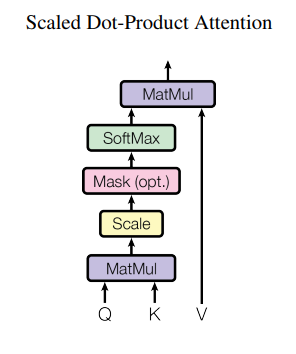

<center><b>Figure 4:</b> Scaled Dot-Product Attention.</center>

<center><b>Source:</b> Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A. N., Kaiser, L., & Polosukhin, I. (2017). Attention Is All You Need. https://arxiv.org/abs/1706.03762</center>

</br>

The term `"self"` emphasizes that the attention mechanism operates within the context of the same sequence, rather than attending to external sequences or inputs. Each position in the sequence acts as both the source and the target of attention, allowing the model to capture dependencies and relationships between different positions within the sequence itself. [5]

In self-attention, the input sequence is divided into three parts:

 - Queries - Represent the positions in the sequence that are used to obtain information from other positions.
 - Keys - Represent the positions in the sequence that are compared to the queries to calculate similarity scores.
 - Values - Represent the information or content at each position in the sequence.

Under the hood, self-attention functions as follows:

1. For each position in the sequence, a query attends to all positions in the sequence by calculating a similarity score between the query and the keys.
2. These similarity scores are then scaled and transformed into attention weights using a softmax function.
3. The attention weights are used to compute a weighted sum of the values.
4. This weighted sum represents the attended information from other positions in the sequence.

Below is a snippet of the self-attention implementation in the full code:

```{python}
class Head(nn.Module):
    """ one head of self-attention """

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        B,T,C = x.shape
        k = self.key(x)   # (B,T,C)
        q = self.query(x) # (B,T,C)
        # compute attention scores ("affinities")
        wei = q @ k.transpose(-2,-1) * C**-0.5 # (B, T, C) @ (B, C, T) -> (B, T, T)
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)
        wei = F.softmax(wei, dim=-1) # (B, T, T)
        wei = self.dropout(wei)
        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,C)
        out = wei @ v # (B, T, T) @ (B, T, C) -> (B, T, C)
        return out
```

### Compare and contrast the concept of attention, self-attention, and cross-attention.

Attention mechanisms are essential components in modern deep learning models, enabling them to focus on relevant information. Two prominent forms of attention are self-attention and cross-attention, each with distinct characteristics and applications. [3] *See Figure 5.*

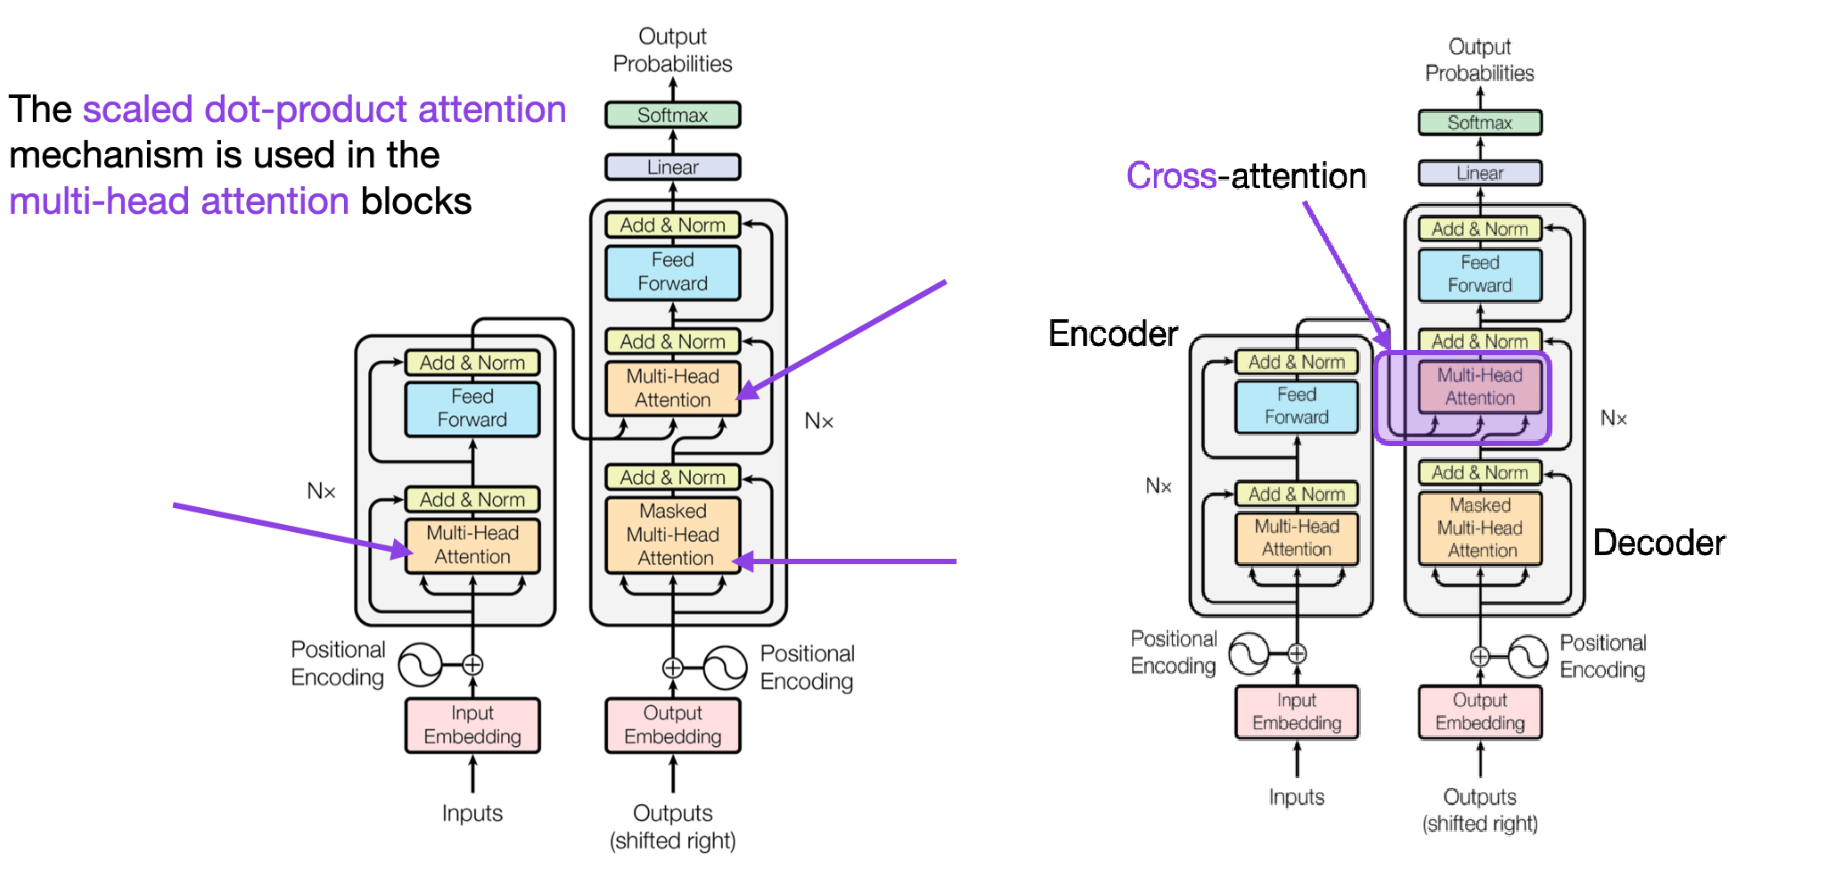

<center><b>Figure 5:</b> (Left) Self-Attention, (Right) Cross-Attention.</center>

<center><b>Image Source:</b> Raschka, S. (2023). Understanding and Coding the Self-Attention Mechanism of Large Language Models From Scratch https://sebastianraschka.com/blog/2023/self-attention-from-scratch.html</center>

<center><b>Original Source:</b> Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A. N., Kaiser, L., & Polosukhin, I. (2017). Attention Is All You Need. https://arxiv.org/abs/1706.03762</center>

</br>

**Comparison and Contrast:**

**Definition:**
- **`Attention:`** Attention is a general concept that refers to the ability of a model to selectively focus on certain elements or features. It can be applied in various contexts and is not limited to specific types of sequences or relationships.

 - **`Self-attention:`** Self-attention, also known as intra-attention, operates within a single sequence and captures relationships between different positions in the sequence itself. It allows the model to weigh the importance of each element based on its relevance to other elements within the same sequence.

 - **`Cross-attention:`** Cross-attention, also known as inter-attention, extends the concept of attention to multiple sequences. It enables the model to consider the interactions between elements from different sequences, facilitating tasks such as machine translation or summarization.
 
**Rationale**
 - **`Attention:`** The rationale behind attention is to **enable the model to selectively focus on relevant information while disregarding irrelevant or less important elements**. By assigning different weights to different parts of the input, attention allows the model to allocate its resources efficiently and attend to the most informative elements.

 - **`Self-attention:`** Self-attention, or intra-attention, builds upon the concept of attention and extends it to capture dependencies and relationships within a single sequence. The rationale behind self-attention is to **enable the model to capture long-range dependencies and interactions between distant elements in the sequence**. This allows the model to consider the contextual information from the entire sequence when making predictions for a particular element.

 - **`Cross-attention:`** Cross-attention, or inter-attention, extends attention to capture relationships between elements in different sequences. The rationale behind cross-attention is to **enable the model to consider the interactions between elements from multiple sequences**. This is particularly useful in tasks such as machine translation, where the model needs to align and understand the relationships between source and target language sequences.
 
**Summary**

In summary, these attention mechanisms provide the model with:

 - **`Attention:`** The ability to attend to relevant information within a single sequence.
 - **`Self-Attention:`** Capture dependencies and interactions within the same sequence.
 - **`Cross-Attention:`** Consider relationships between elements in different sequences.

### What is multi-head attention? 

`Multi-head attention` is an extension of *self-attention* in which multiple attention heads are used to capture different types of information and dependencies within a sequence. In this mechanism, the input sequence is transformed linearly to project it into multiple subspaces, each representing a different attention head. *See Figure 6.*

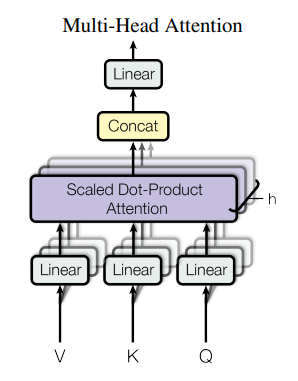

<center><b>Figure 6:</b> Multi-Head Attention consists of several attention layers running in parallel.</center>

<center><b>Source:</b> Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A. N., Kaiser, L., & Polosukhin, I. (2017). Attention Is All You Need. https://arxiv.org/abs/1706.03762</center>

</br>

Here is a snippet of the multi-head attention implementation in the complete nanoGPT code. In this code, a new hyperparameter called num_heads is introduced, which represents the number of attention heads.

```{python}
class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(n_embd, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out

```

### What is a transformer?

A transformer is a neural network architecture designed for processing sequential data, introduced by Vaswani et al. in the paper "Attention Is All You Need" in 2017. It utilizes self-attention mechanisms to capture contextual relationships between positions in the input sequence, addressing the limitations of RNNs and CNNs in modeling long-range dependencies. The transformer has become a fundamental component in natural language processing, enabling improved performance in tasks such as machine translation, text generation, and language understanding. [5]

It consists of an encoder and a decoder, both composed of multiple layers of self-attention and feed-forward neural networks. *See Figure 7.*

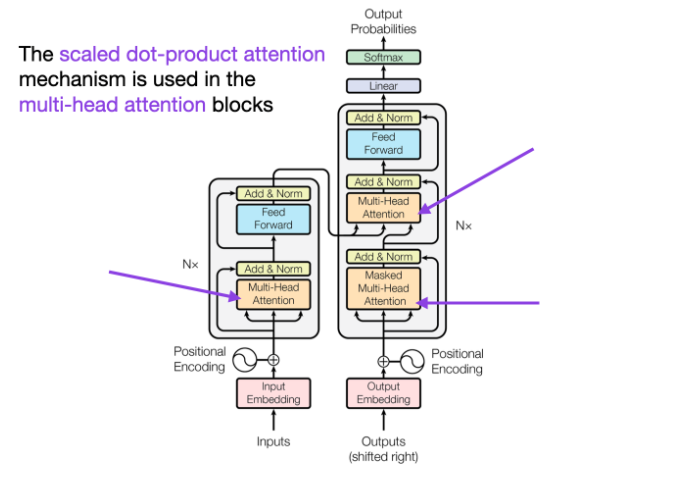

<center><b>Figure 7:</b> The Transformer - model architecture.</center>

<center><b>Image Source:</b> Raschka, S. (2023). Understanding and Coding the Self-Attention Mechanism of Large Language Models From Scratch https://sebastianraschka.com/blog/2023/self-attention-from-scratch.html</center>

<center><b>Original Source:</b> Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A. N., Kaiser, L., & Polosukhin, I. (2017). Attention Is All You Need. https://arxiv.org/abs/1706.03762</center>

### Describe the other components of a transformer: residual connections, layer normalization, and dropout. What purpose do each of them serve?

**Definition**
- **`Residual connections:`** Residual connections, also known as skip connections, are connections that bypass one or more layers in a neural network. In a transformer, residual connections are used to add the original input of a layer to its output. [10] *See Figures 8 and 9.*

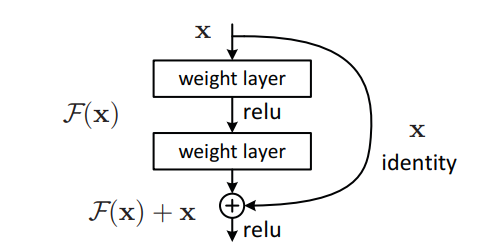

<center><b>Figure 8:</b> Single Residual Block.</center>

<center><b>Source:</b> He, K., Zhang, X., Ren, S., Sun, J. (2015). Deep Residual Learning for Image Recognition. Retrieved from https://arxiv.org/abs/1512.03385</center>

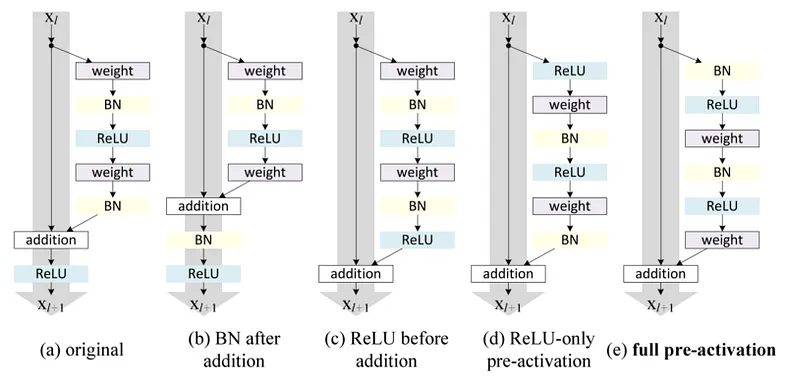

</br>

<center><b>Figure 9:</b> Types of Residual Block.</center>

<center><b>Source:</b> Sahoo, S. (2018). Residual blocks — Building blocks of ResNet. Retrieved from https://towardsdatascience.com/residual-blocks-building-blocks-of-resnet-fd90ca15d6ec</center>

</br>

 - **`Layer normalization:`** Layer normalization is a technique used to normalize the activations within a layer of a neural network. It operates on the feature dimension, normalizing the values across the batch dimension. [11] *See Figure 10.*
 
</br> 
 
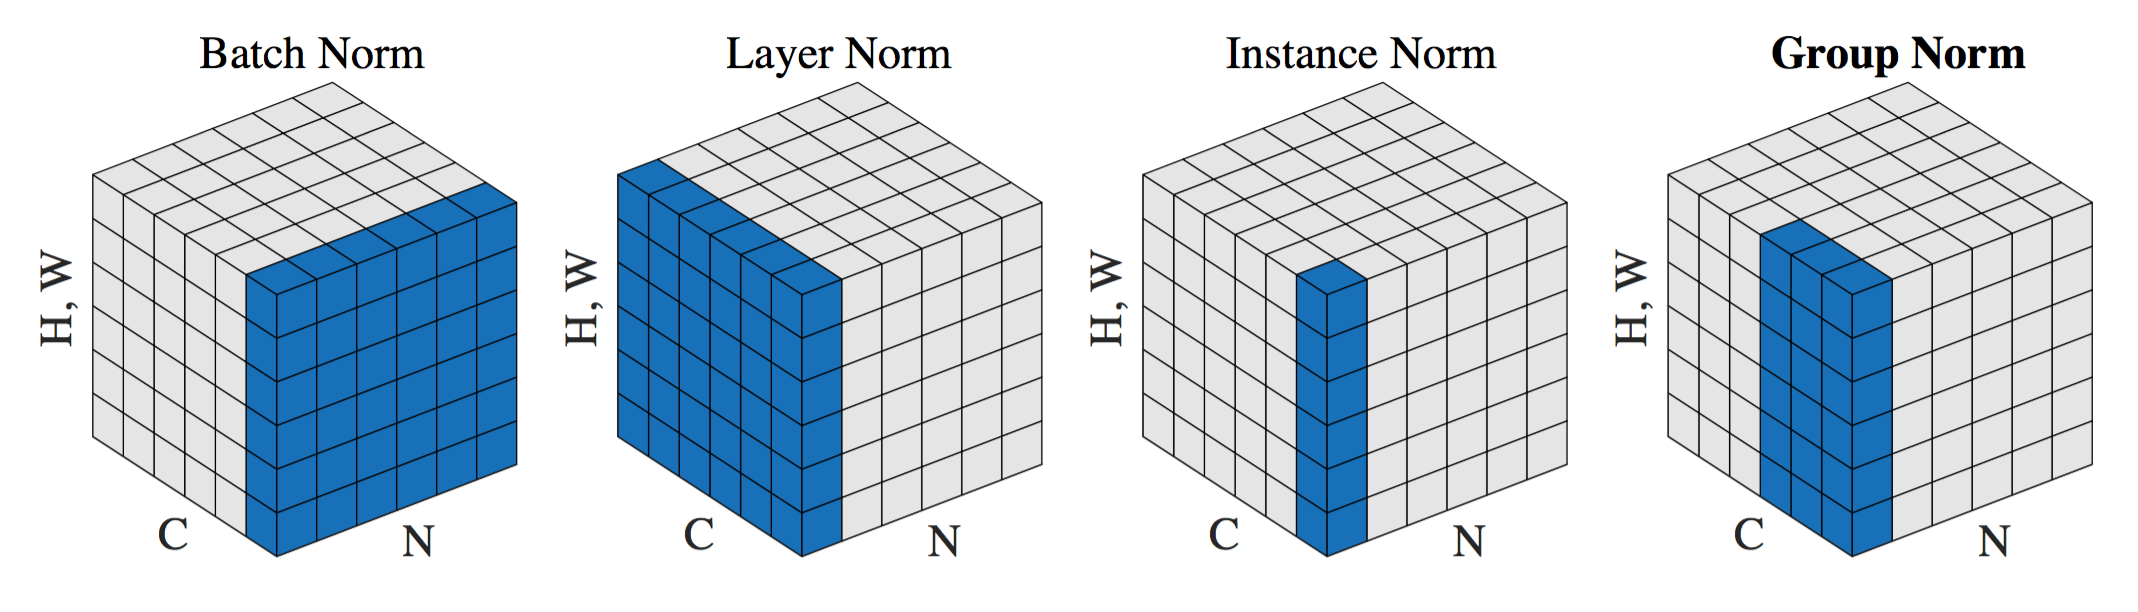
<center><b>Figure 10:</b> Layer Normalization Explained.</center>

<center><b>Original Paper:</b> Ba, J., Kiros, J., Hinton, G. (2016). Layer Normalization. Retrieved from https://arxiv.org/abs/1607.06450</center>

</br>

 - **`Dropout:`** Dropout is a regularization technique commonly used in neural networks, including transformers. During training, dropout randomly sets a fraction of the units (neurons) in a layer to zero with a certain probability. [12][13] *See Figure 11.*

</br>

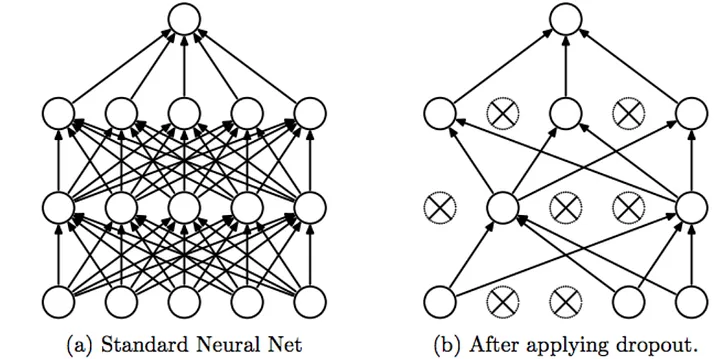

<center><b>Figure 11:</b> Dropout Explained.</center>

<center><b>Source:</b> Budhiraja, A. (2016). Dropout in (Deep) Machine learning. Retrieved from https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5</center>

</br>

**Rationale**
- **`Residual connections:`** The purpose of residual connections is to facilitate the flow of information through the network and alleviate the vanishing gradient problem, enabling more effective training and better gradient flow. [10]
 
 - **`Layer normalization:`** Layer normalization helps address the issue of internal covariate shift, where the distribution of inputs to each layer changes during training. By normalizing the activations, layer normalization helps stabilize the training process, improve model performance, and accelerate convergence. [11]

 - **`Dropout:`** This prevents individual units from relying too heavily on specific input features, forcing the network to learn more robust representations. Dropout helps reduce overfitting, improve generalization, and enhance the overall capacity of the model. [12][13]

### Implementation of nanoGPT

Here, we have the full implementation of nanoGPT which we have encapsulated within a function, allowing for easy hyperparameter tuning. This modular approach enhances code readability and maintainability, making it convenient to experiment with different settings and configurations for the nanoGPT model.

In [45]:
import torch
import torch.nn as nn
from torch.nn import functional as F

# Encapsulated nanoGPT code within a function to allow hyperparameter tuning
def nanoGPT(text, batch_size=16, block_size=32, max_iters=5000,
            eval_interval=100, learning_rate=1e-3,
            device=('cuda' if torch.cuda.is_available() else 'cpu'), 
            eval_iters=200, n_embd=64, n_head=4, n_layer=4, dropout=0.0,
            seed=1337):

    torch.manual_seed(seed)

    # here are all the unique characters that occur in this text
    chars = sorted(list(set(text)))
    vocab_size = len(chars)
    # create a mapping from characters to integers
    stoi = { ch:i for i,ch in enumerate(chars) }
    itos = { i:ch for i,ch in enumerate(chars) }
    encode = lambda s: [stoi[c] for c in s] 
    decode = lambda l: ''.join([itos[i] for i in l]) 

    # Train and test splits
    data = torch.tensor(encode(text), dtype=torch.long)
    n = int(0.9*len(data)) # first 90% will be train, rest val
    train_data = data[:n]
    val_data = data[n:]

    # data loading
    def get_batch(split):
        # generate a small batch of data of inputs x and targets y
        data = train_data if split == 'train' else val_data
        ix = torch.randint(len(data) - block_size, (batch_size,))
        x = torch.stack([data[i:i+block_size] for i in ix])
        y = torch.stack([data[i+1:i+block_size+1] for i in ix])
        x, y = x.to(device), y.to(device)
        return x, y

    @torch.no_grad()
    def estimate_loss():
        out = {}
        model.eval()
        for split in ['train', 'val']:
            losses = torch.zeros(eval_iters)
            for k in range(eval_iters):
                X, Y = get_batch(split)
                logits, loss = model(X, Y)
                losses[k] = loss.item()
            out[split] = losses.mean()
        model.train()
        return out

    class Head(nn.Module):
        """ one head of self-attention """

        def __init__(self, head_size):
            super().__init__()
            self.key = nn.Linear(n_embd, head_size, bias=False)
            self.query = nn.Linear(n_embd, head_size, bias=False)
            self.value = nn.Linear(n_embd, head_size, bias=False)
            self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

            self.dropout = nn.Dropout(dropout)

        def forward(self, x):
            B,T,C = x.shape
            k = self.key(x)   # (B,T,C)
            q = self.query(x) # (B,T,C)
            # compute attention scores ("affinities")
            wei = q @ k.transpose(-2,-1) * C**-0.5 # (B, T, C) @ (B, C, T) -> (B, T, T)
            wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)
            wei = F.softmax(wei, dim=-1) # (B, T, T)
            wei = self.dropout(wei)
            # perform the weighted aggregation of the values
            v = self.value(x) # (B,T,C)
            out = wei @ v # (B, T, T) @ (B, T, C) -> (B, T, C)
            return out

    class MultiHeadAttention(nn.Module):
        """ multiple heads of self-attention in parallel """

        def __init__(self, num_heads, head_size):
            super().__init__()
            self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
            self.proj = nn.Linear(n_embd, n_embd)
            self.dropout = nn.Dropout(dropout)

        def forward(self, x):
            out = torch.cat([h(x) for h in self.heads], dim=-1)
            out = self.dropout(self.proj(out))
            return out

    class FeedFoward(nn.Module):

        def __init__(self, n_embd):
            super().__init__()
            self.net = nn.Sequential(
                nn.Linear(n_embd, 4 * n_embd),
                nn.ReLU(),
                nn.Linear(4 * n_embd, n_embd),
                nn.Dropout(dropout),
            )

        def forward(self, x):
            return self.net(x)

    class Block(nn.Module):
        """ Transformer block: communication followed by computation """

        def __init__(self, n_embd, n_head):
            super().__init__()
            head_size = n_embd // n_head
            self.sa = MultiHeadAttention(n_head, head_size)
            self.ffwd = FeedFoward(n_embd)
            self.ln1 = nn.LayerNorm(n_embd)
            self.ln2 = nn.LayerNorm(n_embd)

        def forward(self, x):
            x = x + self.sa(self.ln1(x))
            x = x + self.ffwd(self.ln2(x))
            return x

    # super simple bigram model
    class BigramLanguageModel(nn.Module):

        def __init__(self):
            super().__init__()
            self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
            self.position_embedding_table = nn.Embedding(block_size, n_embd)
            self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head) for _ in range(n_layer)])
            self.ln_f = nn.LayerNorm(n_embd) # final layer norm
            self.lm_head = nn.Linear(n_embd, vocab_size)

        def forward(self, idx, targets=None):
            B, T = idx.shape
            tok_emb = self.token_embedding_table(idx) # (B,T,C)
            pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C)
            x = tok_emb + pos_emb # (B,T,C)
            x = self.blocks(x) # (B,T,C)
            x = self.ln_f(x) # (B,T,C)
            logits = self.lm_head(x) # (B,T,vocab_size)

            if targets is None:
                loss = None
            else:
                B, T, C = logits.shape
                logits = logits.view(B*T, C)
                targets = targets.view(B*T)
                loss = F.cross_entropy(logits, targets)

            return logits, loss

        def generate(self, idx, max_new_tokens):
            # idx is (B, T) array of indices in the current context
            for _ in range(max_new_tokens):
                # crop idx to the last block_size tokens
                idx_cond = idx[:, -block_size:]
                # get the predictions
                logits, loss = self(idx_cond)
                # focus only on the last time step
                logits = logits[:, -1, :] # becomes (B, C)
                # apply softmax to get probabilities
                probs = F.softmax(logits, dim=-1) # (B, C)
                # sample from the distribution
                idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
                # append sampled index to the running sequence
                idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
            return idx

    model = BigramLanguageModel()
    m = model.to(device)
    # print the number of parameters in the model
    print(sum(p.numel() for p in m.parameters())/1e6, 'M parameters')

    # create a PyTorch optimizer
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

    for iter in range(max_iters):

        # every once in a while evaluate the loss on train and val sets
        if iter % eval_interval == 0 or iter == max_iters - 1:
            losses = estimate_loss()
            print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

        # sample a batch of data
        xb, yb = get_batch('train')

        # evaluate the loss
        logits, loss = model(xb, yb)
        optimizer.zero_grad(set_to_none=True)
        loss.backward()
        optimizer.step()

    # generate from the model
    context = torch.zeros((1, 1), dtype=torch.long, device=device)
    print(decode(m.generate(context, max_new_tokens=2000)[0].tolist()))


Using the default parameters provided in the video, we generated results for the nanoGPT model. With 208,729 parameters, the final validation loss was 1.8198. However, upon evaluation, the generated results were deemed unreasonable, necessitating further tuning. It is worth noting that the entire process took approximately 5 minutes and 16 seconds to run.

In [46]:
nanoGPT(text)

0.209729 M parameters
step 0: train loss 4.4116, val loss 4.4022
step 100: train loss 2.6568, val loss 2.6670
step 200: train loss 2.5090, val loss 2.5058
step 300: train loss 2.4198, val loss 2.4337
step 400: train loss 2.3499, val loss 2.3561
step 500: train loss 2.2963, val loss 2.3127
step 600: train loss 2.2408, val loss 2.2499
step 700: train loss 2.2057, val loss 2.2191
step 800: train loss 2.1636, val loss 2.1869
step 900: train loss 2.1241, val loss 2.1507
step 1000: train loss 2.1025, val loss 2.1294
step 1100: train loss 2.0696, val loss 2.1187
step 1200: train loss 2.0376, val loss 2.0789
step 1300: train loss 2.0242, val loss 2.0641
step 1400: train loss 1.9917, val loss 2.0361
step 1500: train loss 1.9703, val loss 2.0313
step 1600: train loss 1.9626, val loss 2.0489
step 1700: train loss 1.9414, val loss 2.0140
step 1800: train loss 1.9078, val loss 1.9946
step 1900: train loss 1.9081, val loss 1.9885
step 2000: train loss 1.8840, val loss 1.9970
step 2100: train loss 1.

## Fine-tuning nanoGPT

### Tune the nanoGPT model (e.g., add more epochs, adjust batch size, learning rate, embedding dimensions, dropout, other hyperparameters, etc.). Compare a set of generated samples from before and after your tuning.

We proceeded to fine-tune the nanoGPT model using the modified hyperparameters suggested by Andrej Karpathy in the latter part of the video. The following adjustments were made:

- Increased `batch size` to 64
- Increased `block_size` to 256
- Maintained the `number of iterations` at 5000
- Increased the `evaluation interval` to 500
- Decreased the `learning rate` to 3e-4
- Maintained the `evaluation iterations` at 200
- Increased `embedding size` to 64
- Increased the `number of attention heads` to 6
- Increased the `number of transformer block`s to 6
- Retained the `dropout rate` at 0.2

As a result, we achieved a lower validation loss of 1.4882 with 10,788,929 parameters. The fine-tuning process took approximately 30 minutes and 59 seconds. The improved results are much more desirable compared to the previous outcomes.

#### Andrej Karpathy's Hyperparameters

In [52]:
batch_size=64
block_size=256
max_iters=5000
eval_interval=500
learning_rate=3e-4
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters=200
n_embd=384
n_head=6
n_layer=6
dropout=0.2
seed = 1337

nanoGPT(text, batch_size=batch_size, block_size=block_size,
        max_iters=max_iters, eval_interval=eval_interval,
        learning_rate=learning_rate, device=device, eval_iters=eval_iters,
        n_embd=n_embd, n_head=n_head, n_layer=n_layer, dropout=dropout,
        seed=seed)

10.788929 M parameters
step 0: train loss 4.2849, val loss 4.2823
step 500: train loss 2.0030, val loss 2.0897
step 1000: train loss 1.5988, val loss 1.7756
step 1500: train loss 1.4408, val loss 1.6383
step 2000: train loss 1.3431, val loss 1.5698
step 2500: train loss 1.2807, val loss 1.5353
step 3000: train loss 1.2286, val loss 1.5047
step 3500: train loss 1.1840, val loss 1.4855
step 4000: train loss 1.1475, val loss 1.4834
step 4500: train loss 1.1106, val loss 1.4788
step 4999: train loss 1.0786, val loss 1.4882

That CAPULET:
Good false and in outrage, dispatch you;
And your voices: get I'll ear: let not.

BALTHASAR:
Now, no, sice more confessive than you will non.

FRIAR LAURENCE:
A sister than all la-wench'd elky insume stone,
Or enough, for your fatal double plane.

CAPULET:
You writ? and you have very danceless an epeath;
'Tis honest-faced is creased to be so done:
In 'serity that for 'em; 'tis exacule.'

BRARDINE:
It rises more such a leasure of this five: my good a
cold C

#### Trying other hyperparameters

To improve the performance of the nanoGPT model, we performed fine-tuning by adjusting several hyperparameters. The goal was to extract more context from the inputs while reducing training time. We also aimed to achieve a lower validation loss than the original hyperparameters suggested by Karpathy.

As a result, we achieved a lower validation loss of 1.4882 with 6,378,561 parameters. The fine-tuning process took approximately 36 minutes and 41 seconds.

In [55]:
batch_size = 32
block_size = 128
max_iters = 10000
eval_interval = 1000
learning_rate = 3e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 400
n_embd = 256
n_head = 16
n_layer = 8
dropout = 0.2
seed = 1337

nanoGPT(text, batch_size=batch_size, block_size=block_size,
        max_iters=max_iters, eval_interval=eval_interval,
        learning_rate=learning_rate, device=device, eval_iters=eval_iters,
        n_embd=n_embd, n_head=n_head, n_layer=n_layer, dropout=dropout,
        seed=seed)

6.378561 M parameters
step 0: train loss 4.4164, val loss 4.4238
step 1000: train loss 1.7042, val loss 1.8613
step 2000: train loss 1.4343, val loss 1.6361
step 3000: train loss 1.3316, val loss 1.5499
step 4000: train loss 1.2725, val loss 1.5221
step 5000: train loss 1.2337, val loss 1.5170
step 6000: train loss 1.2019, val loss 1.4942
step 7000: train loss 1.1747, val loss 1.4934
step 8000: train loss 1.1474, val loss 1.5020
step 9000: train loss 1.1267, val loss 1.4905
step 9999: train loss 1.1070, val loss 1.4947

Tue have layal ancient know stocks do.

JULIET:
It is now a Rutle shore, my lord!
3 King wild I wish have to dinn's work!

HASTINGS:
Aufidius, may hurtle, hold heart is your friends!
But mistal at thy new your grace be him,
Hear his isuperfor with man, looken home,
Whiles the true, Whom lord on a fair disease,
Then then pagan drop her fire soldiers:
I have born with truth of God.

HENRY BOLINGBROKE:

WARWICK:
Richard to God, takes destruction; but,
and I in the poor plo

### As you experiment with tuning, describe your thought process. Which hyperparameters did you decide to adjust? What were your hypotheses for how it would affect the model?

**Here are the changes relative to the default hyperparameters:**

 - **Batch Size:** We changed the batch size from 16 to 32. By increasing the batch size, we can process more samples in parallel, which can lead to faster convergence during training.

 - **Block Size:** The block size was increased from 32 to 128. A larger block size allows the model to capture longer-range dependencies in the input sequences.

 - **Number of Iterations:** We increased the number of iterations from 5000 to 10000. With more iterations, the model has the opportunity to train for a longer period, potentially improving its ability to learn complex patterns in the data.

 - **Evaluation Interval:** The evaluation interval was increased from 100 to 1000 iterations. By evaluating the model's performance less frequently, we can reduce the computational overhead during training.

 - **Learning Rate:** The learning rate was adjusted from 1e-3 to 3e-3. A higher learning rate can enable faster initial progress during training, allowing the model to explore the parameter space more efficiently.

 - **Evaluation Iterations:** We increased the number of evaluation iterations from 200 to 400. By performing more iterations during evaluation, we can obtain a more reliable estimate of the model's performance on the training and validation sets.

 - **Embedding Size:** The embedding size was increased from 64 to 256. By using a larger embedding size, the model can potentially capture more fine-grained semantic information from the input tokens.

 - **Number of Attention Heads:** The number of attention heads was increased from 4 to 16. More attention heads enable the model to attend to different parts of the input sequence simultaneously, facilitating a more comprehensive understanding of the context.

 - **Number of Transformer Blocks:** We increased the number of transformer blocks from 4 to 8. This allows for a deeper architecture, which can capture more complex dependencies and improve the model's representation learning capabilities.

 - **Dropout Rate:** The dropout rate was retained at 0.2. Dropout regularization helps prevent overfitting by randomly dropping out units during training, encouraging the model to be more robust and generalize better.

Despite the modifications and doubling the training iterations, the obtained validation loss of 1.4947 was slightly higher than the hyperparameters suggested by Karpathy.

One possible recommendation to consider is decreasing the number of epochs to 5000, as the convergence of the loss was observed around steps 5000-6000. Additionally, increasing the batch size and block size could be beneficial for capturing more global context and potentially improving the model's performance.

# Generative AI Documentation

In this assignment, ChatGPT was utilized to accomplish the following tasks:

**Explanations/Ideation:**

1. **Language Models:** Defined language models and provided examples of their applications in natural language processing tasks.
2. **Transformers:** Discussed the architecture of Transformers, highlighting its purpose and distinguishing features from other encoder-decoder architectures.
3. **Self-attention:** Clarified the distinction between attention and self-attention, emphasizing the ability of self-attention to capture dependencies within a sequence.
4. **Scaled attention:** Justified the scaling of attention scores by the square root of the head size, explaining its role in stabilizing gradients during training.
5. **Multihead scaled attention:** Explored the concept of multi-head scaled attention, illustrating its purpose in capturing diverse patterns and improving representation learning.
6. **Transformer block:** Described the composition and functionality of transformer blocks as fundamental components of the Transformer model.
7. **Residual networks:** Elaborated on the concept and motivation behind residual networks, which leverage skip connections to enable better information flow and mitigate the vanishing gradient problem.
9. **Layer normalization:** Differentiated layer normalization from batch normalization, discussing their respective characteristics and benefits in normalizing layer activations.

**Code:**

1. **Docstring:** Added informative docstrings to functions, describing their purpose, input arguments, and return values.
2. **One-liner Comments:** Inserted concise comments within the code to provide brief explanations of specific functionalities or operations.

**Proofreading:**

1. **Grammatical Corrections:** Ensured grammatical accuracy and refined the language used throughout the assignment.
2. **Notebook Flow:** Ensured clarity and coherence in the explanations and descriptions provided, improving the overall flow of the notebook.

# References

**Transformers:**

[1] Karpathy, A. (2023). nanogpt-lecture. Retrieved from https://github.com/karpathy/ng-video-lecture

[2] Introduction to Large Language Models. (n.d.). Attri Blogs. Retrieved from https://attri.ai/blog/introduction-to-large-language-models

[3] Raschka, S. (2023). Understanding and Coding the Self-Attention Mechanism of Large Language Models From Scratch. Retrieved from https://sebastianraschka.com/blog/2023/self-attention-from-scratch.html

</br> 

**Youtube Videos**

[4] Karpathy, A. (2023). Let's build GPT: from scratch, in code, spelled out. Retrieved from https://www.youtube.com/watch?v=kCc8FmEb1nY

</br> 

**Original Papers:**

[5] Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A. N., Kaiser, L., & Polosukhin, I. (2017). Attention Is All You Need. Retrieved from https://arxiv.org/abs/1706.03762

[6] Radford, A., Wu, J., Child, R., Luan, D., Amodei, D., Sutskever, I. (2019). Language Models are Unsupervised Multitask Learners. Retrieved from https://d4mucfpksywv.cloudfront.net/better-language-models/language_models_are_unsupervised_multitask_learners.pdf

[7] Brown, T. B., Mann, B., Ryder, N., Subbiah, M., Kaplan, J., Dhariwal, P., Neelakantan, A., Shyam, P., Sastry, G., Askell, A., Agarwal, S., Krueger, G., Henighan, T., Child, R., Ramesh, A., Ziegler, D. M., Wu, J., Winter, C., Hesse, C., . . . Amodei, D. (2020). Language Models are Few-Shot Learners. Retrieved from https://arxiv.org/abs/2005.14165

[8] Devlin, J., Chang, M., Lee, K., Toutanova, K. (2018). BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding. Retrieved from https://arxiv.org/abs/1810.04805

[9] Raffel, C., Shazeer, N., Roberts, A., Lee, K., Narang, S., Matena, M., Zhou, Y., Li, W., Liu, P. (2019). Exploring the Limits of Transfer Learning with a Unified Text-to-Text Transformer. Retrieved from https://arxiv.org/abs/1910.10683

[10] He, K., Zhang, X., Ren, S., Sun, J. (2015). Deep Residual Learning for Image Recognition. Retrieved from https://arxiv.org/abs/1512.03385

[11] Ba, J., Kiros, J., Hinton, G. (2016). Layer Normalization. Retrieved from https://arxiv.org/abs/1607.06450

[12] Hinton, G., Srivastava, N., Krizhevsky, A., Sutskever, I., Salakhutdinov, R. (2012). Improving neural networks by preventing co-adaptation of feature detectors. Retrieved from https://arxiv.org/abs/1207.0580

[13] Srivastava, N., Hinton, G., Krizhevsky, A., Sutskever, I., Salakhutdinov, R. (2014). Dropout: A Simple Way to Prevent Neural Networks from Overfitting. Retrieved from https://www.cs.toronto.edu/~rsalakhu/papers/srivastava14a.pdf

</br> 

**Other References**

[14] Sahoo, S. (2018). Residual blocks — Building blocks of ResNet. Retrieved from https://towardsdatascience.com/residual-blocks-building-blocks-of-resnet-fd90ca15d6ec

[15] Budhiraja, A. (2016). Dropout in (Deep) Machine learning. Retrieved from https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5